In [45]:
%pip install datasets matplotlib seaborn wordcloud numpy

In [46]:
# @title Imports

from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np


In [47]:
# @title Dataset download

dataset = load_dataset("surrey-nlp/PLOD-CW")

In [48]:
# @title Sequence Flattener

def flatten_seq(dataset):

    all_tokens = []
    all_tags = []

    for example in dataset:
        all_tokens.extend(example['tokens'])
        all_tags.extend(example['ner_tags'])

    return all_tokens, all_tags

f_token_train, f_tag_train = flatten_seq(dataset["train"])
f_token_valid, f_tag_valid = flatten_seq(dataset["validation"])
f_token_test, f_tag_test = flatten_seq(dataset["test"])


In [49]:
# @title Frequency Calculator

def freq_calc(tokens, tags):

    token_freq = Counter(tokens)
    tag_freq = Counter(tags)

    return token_freq, tag_freq


f_token_train_freq, f_tag_train_freq = freq_calc(f_token_train, f_tag_train)
f_token_valid_freq, f_tag_valid_freq = freq_calc(f_token_valid, f_tag_valid)
f_token_test_freq, f_tag_test_freq = freq_calc(f_token_test, f_tag_test)



In [50]:
# @title Tag Frequency Distribution Plot

def freq_dist(data_counts):

    # Creating the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(data_counts.keys(), data_counts.values(), color='skyblue')
    plt.xlabel('NER Tags')
    plt.ylabel('Frequency')
    plt.title('Distribution of NER Tags')
    plt.show()


In [51]:
# @title Wordcloud Generator (looks cool)

def gen_wordcloud(data_counts):


    # Generating the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_counts)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()




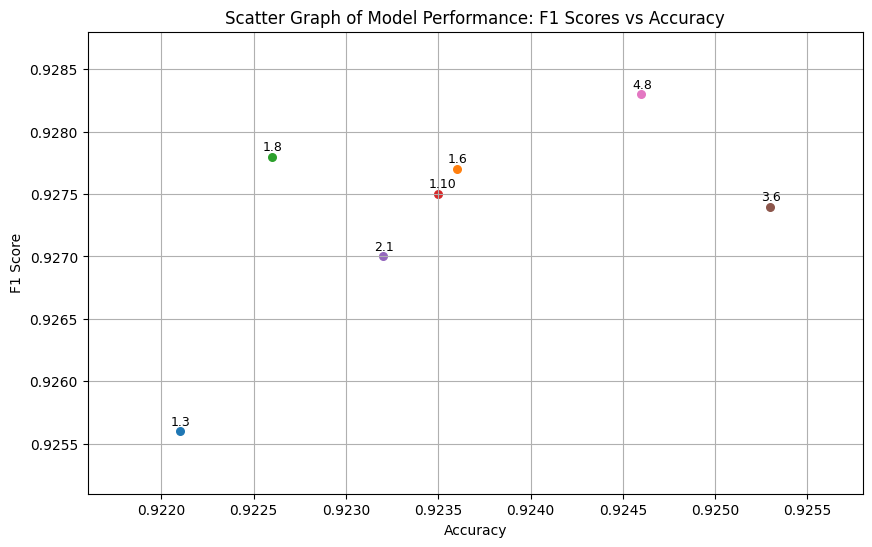

In [52]:
# @title F1 Score vs Accuracy [On Best Performing Models]

test_numbers = ["1.3", "1.6", "1.8", "1.10", "2.1", "3.6", "4.8"]
f1_scores = [0.9256, 0.9277, 0.9278, 0.9275,
             0.927, 0.9274, 0.9283]
accuracies = [0.9221, 0.9236, 0.9226, 0.9235,
              0.9232, 0.9253, 0.9246]

plt.figure(figsize=(10, 6))
# Scatter plot
for i, test_number in enumerate(test_numbers):
    plt.scatter(accuracies[i], f1_scores[i], s=30)
    plt.text(accuracies[i]-0.00005, f1_scores[i]+0.00005, f'{test_number}', fontsize=9)

plt.xlim(min(accuracies) - 0.0005, max(accuracies) + 0.0005)
plt.ylim(min(f1_scores) - 0.0005, max(f1_scores) + 0.0005)

plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('Scatter Graph of Model Performance: F1 Scores vs Accuracy')
plt.grid(True)
plt.show()



In [53]:
# @title Tokens and tags sample

print(f"""
Train data:
    Sample of first 10 tokens:
        {f_token_train[0:10]}
    Sample of first 10 tags:
        {f_tag_train[0:10]}
    Top 10 frequency words:
        {sorted(f_token_train_freq.items(), key=lambda item: item[1], reverse=True)[:10]}
    Tag Frequency:
        {f_tag_train_freq}

Validation Data:
    Sample of first 10 tokens:
        {f_token_valid[0:10]}
    Sample of first 10 tags:
        {f_tag_valid[0:10]}
    Top 10 frequency words:
        {sorted(f_token_valid_freq.items(), key=lambda item: item[1], reverse=True)[:10]}
    Tag Frequency:
        {f_tag_valid_freq}

Test Data:
    Sample of first 10 tokens:
        {f_token_test[0:10]}
    Sample of first 10 tags:
        {f_tag_test[0:10]}
    Top 10 frequency words:
        {sorted(f_token_test_freq.items(), key=lambda item: item[1], reverse=True)[:10]}
    Tag Frequency:
        {f_tag_test_freq}
""")


Train data:
    Sample of first 10 tokens:
        ['For', 'this', 'purpose', 'the', 'Gothenburg', 'Young', 'Persons', 'Empowerment', 'Scale', '(']
    Sample of first 10 tags:
        ['B-O', 'B-O', 'B-O', 'B-O', 'B-LF', 'I-LF', 'I-LF', 'I-LF', 'I-LF', 'B-O']
    Top 10 frequency words:
        [(',', 2268), ('(', 1583), (')', 1575), ('the', 1136), ('.', 1073), ('of', 995), ('and', 903), ('-', 901), (';', 691), ('in', 585)]
    Tag Frequency:
        Counter({'B-O': 32971, 'I-LF': 3231, 'B-AC': 2336, 'B-LF': 1462})

Validation Data:
    Sample of first 10 tokens:
        ['=', 'Manual', 'Ability', 'Classification', 'System', ';', 'QUEST', '=', 'Quest', '-']
    Sample of first 10 tags:
        ['B-O', 'B-LF', 'I-LF', 'I-LF', 'I-LF', 'B-O', 'B-AC', 'B-O', 'B-LF', 'I-LF']
    Top 10 frequency words:
        [(',', 244), ('(', 195), (')', 188), ('the', 168), ('of', 143), ('.', 126), ('-', 125), ('and', 111), ('in', 72), (']', 62)]
    Tag Frequency:
        Counter({'B-O': 4261, 'I-LF':

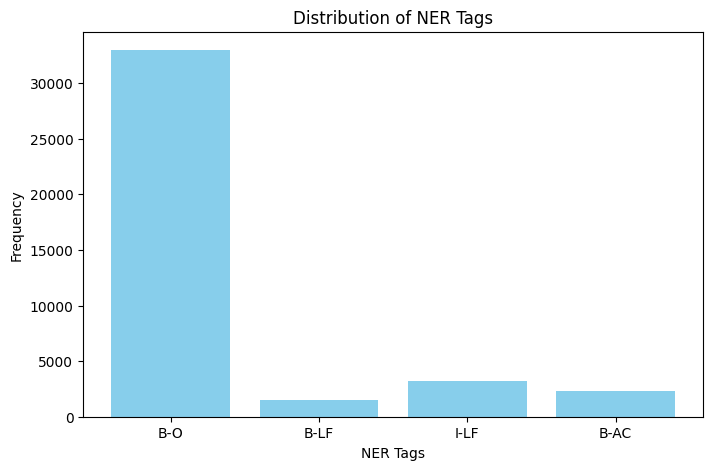

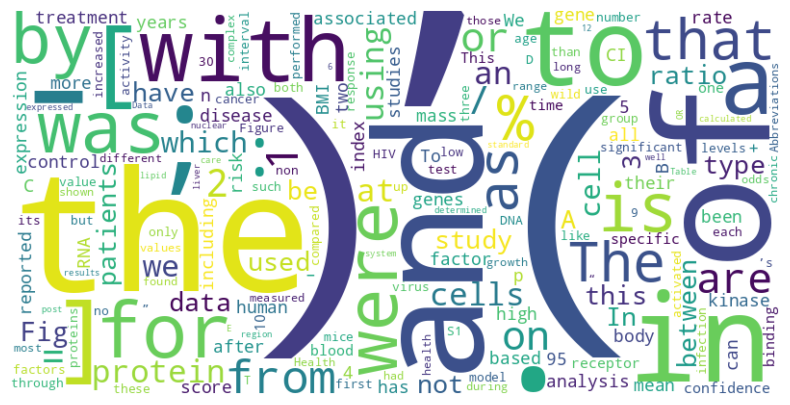

In [54]:
# @title Graphs [Train Dataset]

freq_dist(f_tag_train_freq)

print("\n")

gen_wordcloud(f_token_train_freq)

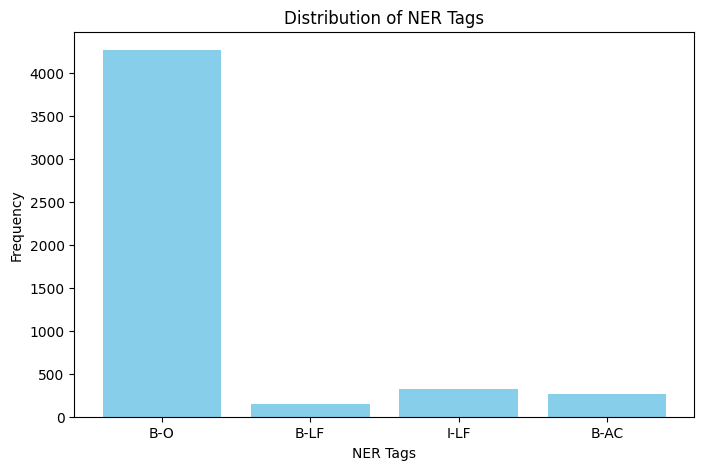

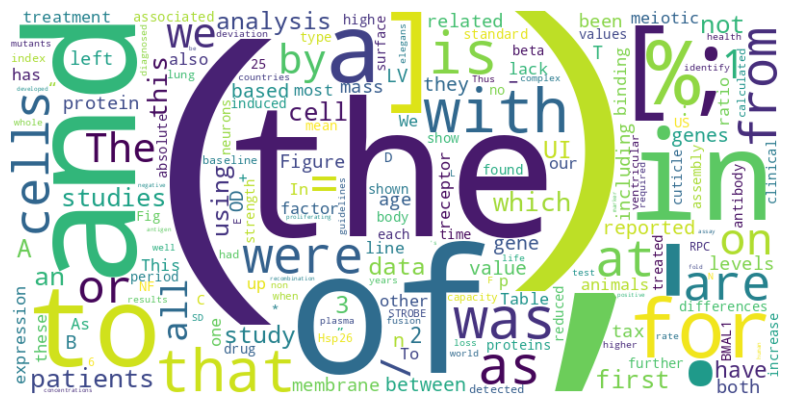

In [55]:
# @title Graphs [Validation Dataset]

freq_dist(f_tag_valid_freq)

print("\n")

gen_wordcloud(f_token_valid_freq)

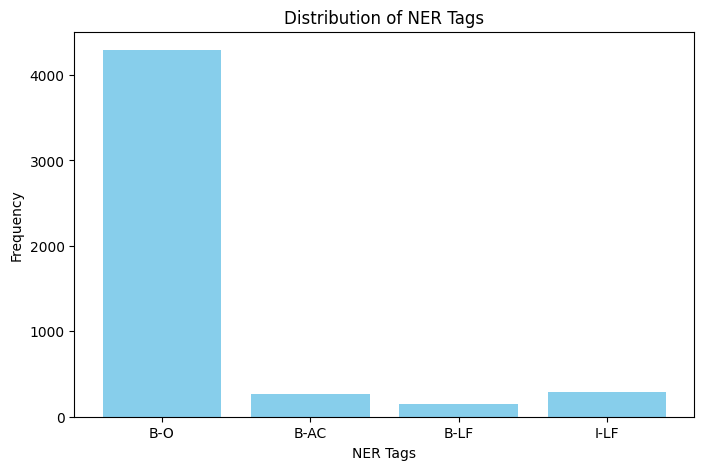

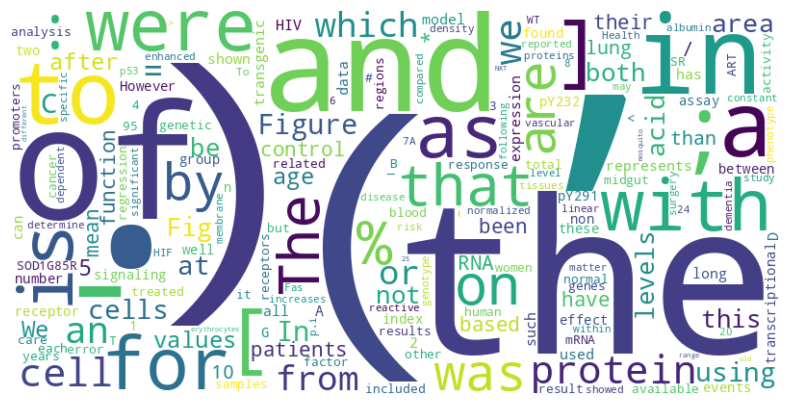

In [56]:
# @title Graphs [Test Dataset]

freq_dist(f_tag_test_freq)

print("\n")

gen_wordcloud(f_token_test_freq)